# Prep Work for the data

In [16]:
import os
import pandas as pd
os.listdir()
df  = pd.read_excel('BrownFat.xls')
df.head()

,Id,Sex,Diabetes,Age,Day,Month,Ext_Temp,2D_Temp,3D_Temp,7D_Temp,...,Weigth,Size,BMI,Glycemy,LBW,Cancer_Status,Cancer_Type,TSH,BrownFat,Total_vol
0,2,1,0,52.243185,3,January,-5.9,-3.3,-3.07,-7.29,...,62.0,157.0,25.153150,5.5,43.259469,0.0,0.0,NaN,0,0.0
1,3,2,0,68.988338,3,January,-5.9,-3.3,-3.07,-7.29,...,85.0,182.0,25.661152,4.8,65.580667,0.0,0.0,2.69,0,0.0
2,4,2,0,54.781320,3,January,-3.8,-3.3,-3.07,-7.29,...,95.0,174.0,31.377989,6.1,66.344365,1.0,2.0,NaN,0,0.0
3,5,2,1,70.390275,3,January,-3.8,-3.3,-3.07,-7.29,...,66.0,177.0,21.066743,6.8,54.802815,1.0,NaN,NaN,0,0.0
4,6,1,0,53.519205,3,January,-1.3,-3.3,-3.07,-7.29,...,62.0,163.0,23.335466,5.7,44.927376,1.0,1.0,NaN,0,0.0


In [17]:
x = df.drop(['BrownFat','Total_vol'],1).select_dtypes(include = ['float64','int64'])
y = df.BrownFat
x.head()

,Id,Sex,Diabetes,Age,Day,Ext_Temp,2D_Temp,3D_Temp,7D_Temp,1M_Temp,Season,Duration_Sunshine,Weigth,Size,BMI,Glycemy,LBW,Cancer_Status,Cancer_Type,TSH
0,2,1,0,52.243185,3,-5.9,-3.3,-3.07,-7.29,-9.81,4,529.2,62.0,157.0,25.153150,5.5,43.259469,0.0,0.0,NaN
1,3,2,0,68.988338,3,-5.9,-3.3,-3.07,-7.29,-9.81,4,529.2,85.0,182.0,25.661152,4.8,65.580667,0.0,0.0,2.69
2,4,2,0,54.781320,3,-3.8,-3.3,-3.07,-7.29,-9.81,4,529.2,95.0,174.0,31.377989,6.1,66.344365,1.0,2.0,NaN
3,5,2,1,70.390275,3,-3.8,-3.3,-3.07,-7.29,-9.81,4,529.2,66.0,177.0,21.066743,6.8,54.802815,1.0,NaN,NaN
4,6,1,0,53.519205,3,-1.3,-3.3,-3.07,-7.29,-9.81,4,529.2,62.0,163.0,23.335466,5.7,44.927376,1.0,1.0,NaN


In [18]:
# fill with  column mean
for i in x.columns:
    x[i] = x[i].fillna(x[i].mean())

In [19]:
# standardize the data
from sklearn.preprocessing import MinMaxScaler

scale= MinMaxScaler()
scale = scale.fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA()

X_pca = pca.fit_transform(scale)

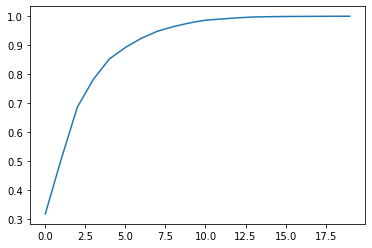

In [20]:
## Visualize the PCA 
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [23]:
yJ = pd.DataFrame(X_pca[:,0:2],columns = ['C1','C2'])
J['Y'] = [str(i) for i in y]
import plotly.express as px
px.scatter(J,x = 'C1',y = 'C2'
                ,color = 'Y'
               )

ValueError: Length of values does not match length of index

# The ML Model

In [30]:
# Model Selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
x_train1,x_test1,y_train1,y_test1 = train_test_split(X_pca,y,test_size = 0.2)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
model = LogisticRegression()
X_train = [x_train,x_train1]
X_test = [x_test,x_test1]
Y_train = [y_train,y_train1]
Y_test = [y_test,y_test1]
pc = ['NO PCA','With PCA']

def modeller(model):
    preds = []
    for a,b,c,d,e in zip(X_train,X_test,Y_train,Y_test,pc):

        model.fit(a,c)
        pred = model.predict(b)
        print('Accuracy - {}:{} is:{}'.format(type(model).__name__,e,accuracy_score(pred,d)))
        preds.append(pred)
    return preds


    

In [67]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import LinearSVC,NuSVC,SVC
from sklearn.cluster import KMeans
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(metric = 'binary_logloss',objective='binary',learning_rate=0.003,n_estimators=200)
RF = RandomForestClassifier(n_estimators =200)
GB = GradientBoostingClassifier(n_estimators =200)
bag = BaggingClassifier(n_estimators = 200)
svm1 = LinearSVC()
svm2 = NuSVC()
svc3 = SVC()
kmeans = KMeans(n_clusters =2,random_state =2)

models = [lgbm,RF,GB,bag,svm1,
          #svm2,
          svc3,model,kmeans]


In [68]:
data = list(map(modeller,models))

Accuracy - LGBMClassifier:NO PCA is:0.9318885448916409
Accuracy - LGBMClassifier:With PCA is:0.9380804953560371
Accuracy - RandomForestClassifier:NO PCA is:0.9318885448916409
Accuracy - RandomForestClassifier:With PCA is:0.9380804953560371
Accuracy - GradientBoostingClassifier:NO PCA is:0.9267285861713106
Accuracy - GradientBoostingClassifier:With PCA is:0.9298245614035088
Accuracy - BaggingClassifier:NO PCA is:0.9298245614035088
Accuracy - BaggingClassifier:With PCA is:0.9380804953560371


/home/sophicist/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Accuracy - LinearSVC:NO PCA is:0.9318885448916409
Accuracy - LinearSVC:With PCA is:0.9380804953560371
Accuracy - SVC:NO PCA is:0.9318885448916409
Accuracy - SVC:With PCA is:0.9380804953560371
Accuracy - LogisticRegression:NO PCA is:0.9318885448916409


/home/sophicist/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy - LogisticRegression:With PCA is:0.9380804953560371
Accuracy - KMeans:NO PCA is:0.500515995872033
Accuracy - KMeans:With PCA is:0.42105263157894735


In [73]:
np.array(data).shape

(8, 2, 969)